In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [3]:
def plot_rewards(project_name, ax):
    reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format(project_name),
                           header=None,
                           names=["Episode", "Reward"])
    ax.plot(reward_df["Episode"], reward_df["Reward"])
    ax.set_xlabel("Episode")
    ax.set_ylabel("Reward")
    ax.set_xticks(np.arange(0, reward_df["Episode"].max()+1, 10))
    #ax.set_yticks(np.arange(0, reward_df["Reward"].max()+1))
    ax.set_title("Rewards per Episode For {0}".format(project_name))

In [4]:
def good_episodes(project_name, threshold=1000):
    reward_df = pd.read_csv("../learning_movies/{0}/reward_history.csv".format(project_name),
                           header=None,
                           names=["Episode", "Reward"])
    return reward_df[reward_df["Reward"] > threshold].set_index("Episode")

In [5]:
def prep_to_convert_all_good_episodes(project_name, threshold):
    to_be_converted = good_episodes(project_name, threshold).index
    full_options = '' 
    for idx, episode in enumerate(good_episodes(project_name, threshold).index):
        filepath = "learning_movies/{0}/SuperMarioWorld-Snes-Start-{1:06d}.bk2".format(project_name, episode)
        full_options += filepath
        full_options += " + "
        if idx % 3 == 2:
            print(full_options[:-3], '\n')
            full_options = ''
    return full_options[:-3]

In [18]:
def visualize_training(project_name, threshold=1000):
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_rewards(project_name, ax)
    return good_episodes(project_name, threshold)

# Training Notes - Yoshi's Island 1-2 (AKA Level 1)

- Buffer size 256
- Batch size 8
- 100 Episodes
- Rewards have original scalings made many moons ago
- Episode 13 win! (the index on the df hadn't been fixed at this point)
- This was the first training session with a small buffer + small batch size. It was also the first session using bigger filters + strides on the CNN

,Reward
Episode,
14,4639.610094
19,4516.384699
20,4460.434671
39,4447.210043
44,4519.526844


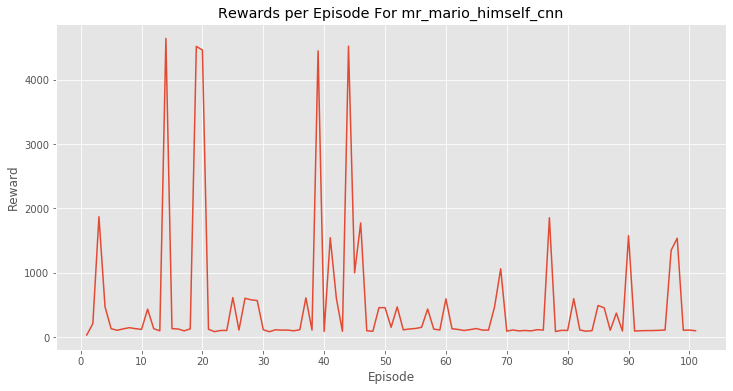

In [21]:
visualize_training("mr_mario_himself_cnn", 4000)

# Training Notes - Yoshi's Island 1-2 (AKA Level 1)

- Buffer size 256
- Batch size 8
- 250 Episodes
- Rewards scaled down due to being unnecessarily high
- Episode 9 win!

,Reward
Episode,
3,1626.878246
6,1659.237395
9,2045.854785
10,1253.174625
13,1691.085028


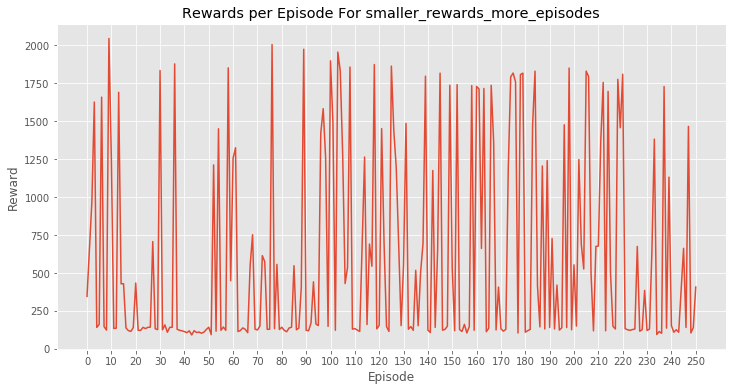

In [26]:
visualize_training("smaller_rewards_more_episodes").head()

# Training Notes - Yoshi's Island 1-1 (AKA level 2)

- Buffer size 256
- Batch size 8
- 200 Episodes
- Changed reward scaling

,Reward
Episode,
0,900.349795
1,252.861622
3,167.923861
5,157.054548
7,156.012179
17,260.916719
19,181.298856
86,219.293395
87,209.110003


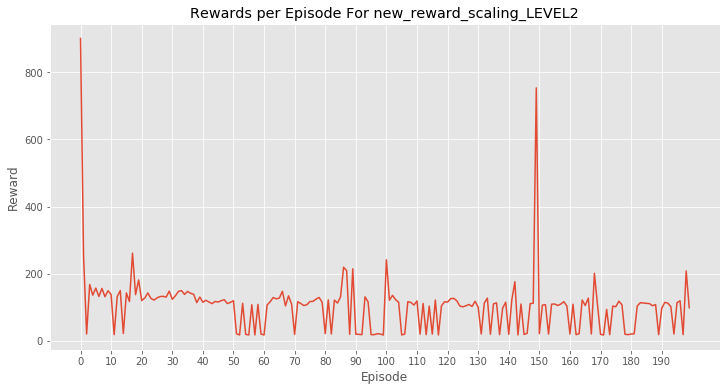

In [24]:
visualize_training("new_reward_scaling_LEVEL2", 150)

# Training Notes - Yoshi's Island 1-2 (AKA level 1)

- Buffer size 256
- Batch size 8
- 200 Episodes
- Rewards same as new scalings

,Reward
Episode,
4,1907.090320
15,1475.122306
17,1504.042865
22,2537.320827
27,1471.010022


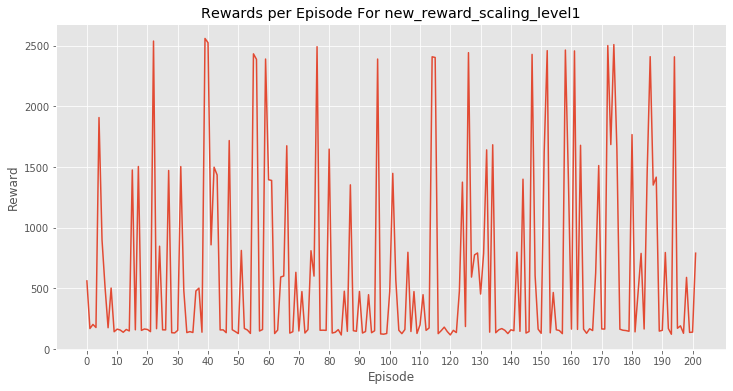

In [25]:
visualize_training("new_reward_scaling_level1").head()

# Training Notes - Yoshi's Island 1-2 (AKA level 1)

- Buffer size 256
- Batch size 8
- 200 Episodes
- Rewards changes to be a 1:1 reward:penalty with X movement
- Changed the transform reward function to just be a wrapper, things might be very different now...

,Reward
Episode,
3,1871.004856
14,4639.610094
19,4516.384699
20,4460.434671
39,4447.210043
41,1545.446699
44,4519.526844
45,1000.091387
46,1774.510173


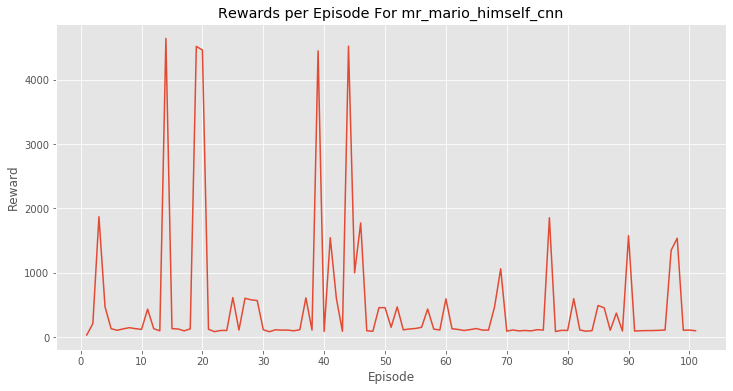

In [19]:
visualize_training("reward_wrapper_test")

# Time to beat the underwater level (Forest2)

## Training Notes - Underwater Level

- Buffer size 128
- Batch size 8
- 500 Episodes
- CNN Base Filters 32
- Rewards same as new scalings
- Episode 300 seems to be memorizing, maybe not learning as intended

    This was the initial model attempt on the underwater level. It had 4 episodes being over 200 reward, the best being episode 300. It's been deleted to make space on my harddrive. This model sucked

## Training Notes - Underwater Level

- Buffer size 64
- Batch size 2
- 500 Episodes
- CNN Base Filters 32
- Rewards changed back to encouraging right movement (1:1 reward:penalty)
- Stochastic frameskip was removed starting here. This is in an attempt to allow for more consistency in model performance


- This thing majorly sucked

,Reward
Episode,
210,257.602008


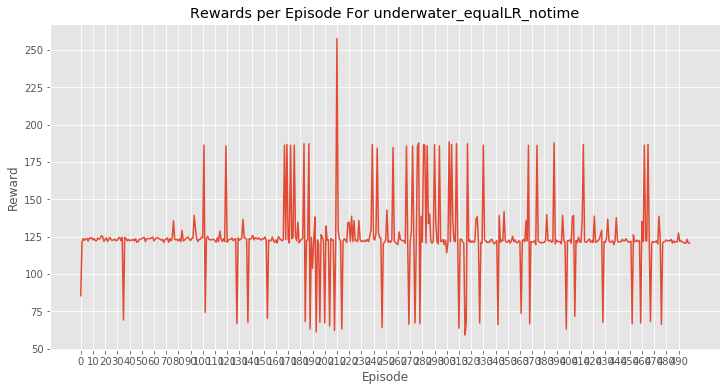

In [29]:
visualize_training("underwater_equalLR_notime", 200)